In [5]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [6]:
c = load_breast_cancer()

In [7]:
x = pd.DataFrame(c.data,columns=c.feature_names)

In [8]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
y = c.target

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [13]:
x_train= sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [14]:
x_train

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [16]:
import tensorflow as tf
tf.random.set_seed(10)
from tensorflow import keras

In [18]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(30,)),
            keras.layers.Dense(6,activation='relu',kernel_initializer="he_uniform"),
            keras.layers.Dense(6, activation='relu',kernel_initializer="he_uniform"),
            keras.layers.Dense(1,activation='sigmoid',kernel_initializer="glorot_uniform")
])

In [20]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train,y_train,validation_split=0.1,epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 17ms/step - loss: 0.8950 - accuracy: 0.4132 - val_loss: 0.6369 - val_accuracy: 0.4130
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.4792 - val_loss: 0.5561 - val_accuracy: 0.4565
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.6039 - val_loss: 0.4937 - val_accuracy: 0.6739
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7897 - val_loss: 0.4455 - val_accuracy: 0.8261
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.4280 - accuracy: 0.8778 - val_loss: 0.4058 - val_accuracy: 0.9348
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.3832 - accuracy: 0.9144 - val_loss: 0.3711 - val_accuracy: 0.9565
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.9315 - val_loss: 0.3394 - val_accuracy: 0.9783
Epoch 8/50
13/13 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


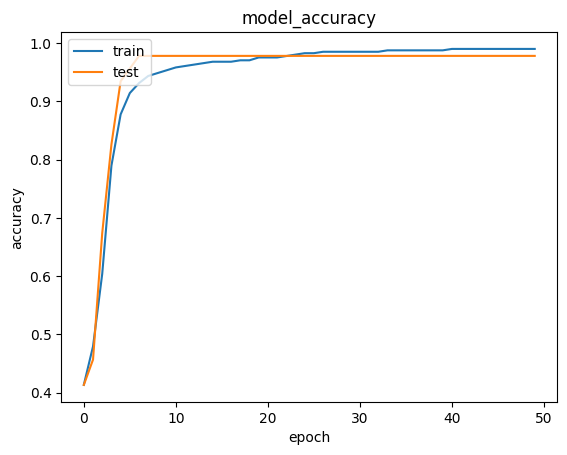

In [24]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

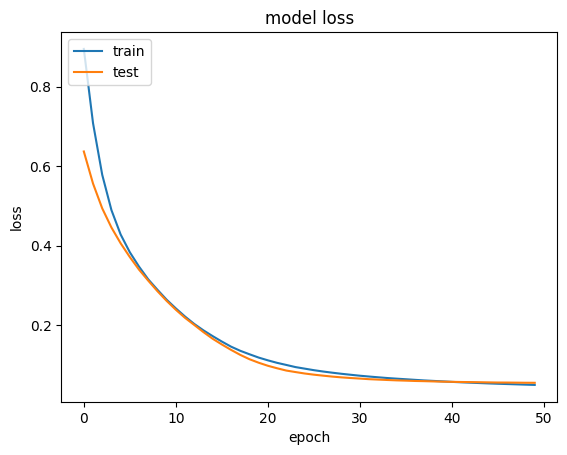

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 4ms/step


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[42,  3],
       [ 0, 69]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9736842105263158